In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [54]:
loan_data_inputs_test=pd.read_csv('Data/loan_data_inputs_test.csv',index_col=0)
loan_data_targets_test=pd.read_csv('Data/loan_data_targets_test.csv',index_col=0,header=None)

In [55]:
loan_data_targets_test=pd.Series(loan_data_targets_test.iloc[1:,0])

In [56]:
loan_data_targets_test.index=loan_data_targets_test.index.astype('int64')

In [57]:
loan_data_targets_test=loan_data_targets_test.astype('int64')

In [58]:
model=pickle.load(open('pd_model.sav','rb'))
model.coef_
                       

array([[ 1.05003945,  0.95342831,  0.76636576,  0.57460491,  0.37479465,
         0.20853507,  0.10572575,  0.11707185,  0.06084866,  0.04287587,
         0.07835867,  0.08362622,  0.07634202,  0.15586897,  0.11193113,
         0.19596662,  0.26496505,  0.24461036,  0.28984308,  0.34679199,
         0.46013128,  0.08864573, -0.00527973,  0.36387132,  0.24198912,
         0.24240297,  0.28672246,  0.11844172,  0.08704454,  0.12033151,
         0.09655478,  0.06926961,  0.07870546,  0.13883551,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.5240224 ,  0.96045598,  0.50941459,  0.23397797,  0.05532979,
         0.01518919,  0.00484663, -0.02195257,  0.024764  ,  0.06811672,
         0.83463346,  0.66496039,  0.45309957,  0.15654452, -0.00178079,
         0.06419187,  0.16620815,  0.20879961,  0.31486501,  0.36063544,
         0.46404828,  0.47942101,  0.53623217,  0.62876162,  0.61259732,
        -0.06643699,  0.09547836,  0.09470868,  0.0

In [101]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [102]:
ref_categories = ['grade:G',
'home_ownership:RENT',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [103]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
274292,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
346131,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
465415,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
98912,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
452655,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [62]:
y_hat_test=model.predict(inputs_test)

In [63]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
y_hat_test_proba=model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.07453664, 0.92546336],
       [0.14481095, 0.85518905],
       [0.07510461, 0.92489539],
       ...,
       [0.18133069, 0.81866931],
       [0.09558824, 0.90441176],
       [0.12953903, 0.87046097]])

In [65]:
y_hat_test_proba = y_hat_test_proba[:][:,1]
loan_data_targets_test_temp=loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)
df_actual_predicted_probs= pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)


In [66]:
df_actual_predicted_probs.columns=['loan_data_targets_test','y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.925463
1,1,0.855189
2,1,0.924895
3,1,0.963365
4,1,0.780489


# Accuracy and Area under the curve

In [67]:
thresh=0.5
df_actual_predicted_probs['y_hat_test']=np.where(df_actual_predicted_probs['y_hat_test_proba']>thresh,1,0)

In [68]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,1,0.925463,1
1,1,0.855189,1
2,1,0.924895,1
3,1,0.963365,1
4,1,0.780489,1


In [69]:
loan_data_targets_test

0        1
1        1
2        1
3        1
4        1
        ..
93252    1
93253    1
93254    1
93255    1
93256    0
Name: 1, Length: 93257, dtype: int64

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(np.array(loan_data_targets_test),y_hat_test)
cm

array([[    5, 10276],
       [    7, 82969]], dtype=int64)

Text(0.5, 12.5, 'Predicted')

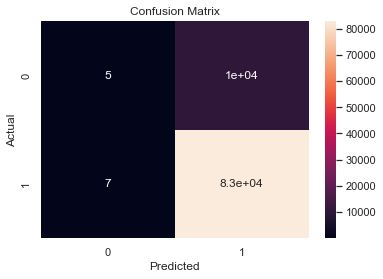

In [71]:

sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [72]:
from sklearn.metrics import roc_auc_score,roc_curve
roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980547, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20516776e-05, 2.65136907e-03, ...,
        9.99975897e-01, 9.99975897e-01, 1.00000000e+00]),
 array([1.98991522, 0.98991522, 0.98499311, ..., 0.46601983, 0.40827482,
        0.37009751]))

In [73]:
fpr,tpr,threshhold=roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

Text(0.5, 1.0, 'ROC curve')

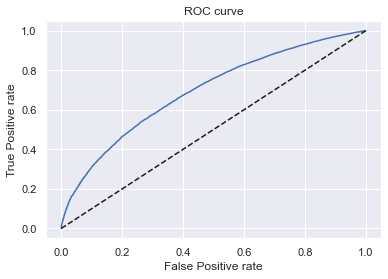

In [74]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')

In [75]:
area=roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
print('Area under the curve is : ',area)
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.

Area under the curve is :  0.6939685536154461


# Gini and Kolmogorov- Simirnov

In [76]:
df_actual_predicted_probs=df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [77]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [78]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,10375,1,0.370098,0
1,62024,1,0.394966,0
2,64698,0,0.408275,0
3,89769,0,0.455717,0
4,68930,1,0.466020,0


In [79]:
df_actual_predicted_probs['Cumulative N population']=df_actual_predicted_probs.index+1
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [80]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N population,Cumulative N Good,Cumulative N Bad
0,10375,1,0.370098,0,1,1,0
1,62024,1,0.394966,0,2,2,0
2,64698,0,0.408275,0,3,2,1
3,89769,0,0.455717,0,4,2,2
4,68930,1,0.466020,0,5,3,2


In [81]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [82]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,10375,1,0.370098,0,1,1,0,0.000011,0.000012,0.000000
1,62024,1,0.394966,0,2,2,0,0.000021,0.000024,0.000000
2,64698,0,0.408275,0,3,2,1,0.000032,0.000024,0.000097
3,89769,0,0.455717,0,4,2,2,0.000043,0.000024,0.000195
4,68930,1,0.466020,0,5,3,2,0.000054,0.000036,0.000195


Gini

Text(0.5, 1.0, 'Gini')

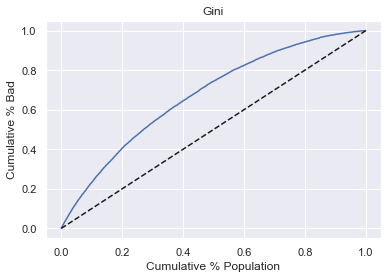

In [83]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'],linestyle='--',color='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [84]:
#relation between area under roc curve and gini
gini=2*area - 1
print('Gini is : ',gini)

Gini is :  0.38793710723089214


Kolmogorov-Smirnov 

Text(0.5, 1.0, 'Kolmogorov- Smirnov')

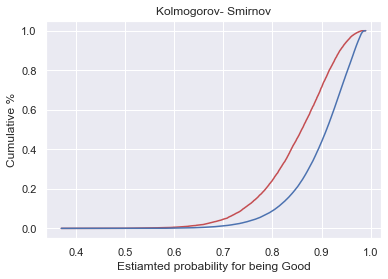

In [85]:
sns.set()
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Good'], color='b')
plt.ylabel('Cumulative %')
plt.xlabel('Estiamted probability for being Good')
plt.title('Kolmogorov- Smirnov')

In [86]:
ks=max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
print('Difference between bad and good is : ',ks)

Difference between bad and good is :  0.27742954786916496


The two cumulative distribution function are sufficiently far away from each other and the model has satisfactory predictive power.

# Creating ScoreCard

In [87]:
summary_table=pd.DataFrame(data=inputs_test.columns.values,columns=['Feature name'])
summary_table['Coeffeints']=np.transpose(model.coef_)
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',model.intercept_[0]]
summary_table=summary_table.sort_index()
summary_table

,Feature name,Coeffeints
0,Intercept,-1.353597
1,grade:A,1.050039
2,grade:B,0.953428
3,grade:C,0.766366
4,grade:D,0.574605
...,...,...
80,mths_since_last_record:3-20,0.531544
81,mths_since_last_record:21-31,0.523750
82,mths_since_last_record:32-80,0.701796
83,mths_since_last_record:81-86,0.370488


In [88]:
df_ref_cat=pd.DataFrame(ref_categories,columns=['Feature name'])
df_ref_cat['Coeffeints']=0

In [89]:
df_scorecard=pd.concat([summary_table,df_ref_cat])
df_scorecard=df_scorecard.reset_index()

df_scorecard

,index,Feature name,Coeffeints
0,0,Intercept,-1.353597
1,1,grade:A,1.050039
2,2,grade:B,0.953428
3,3,grade:C,0.766366
4,4,grade:D,0.574605
...,...,...,...
97,12,acc_now_delinq:0,0.000000
98,13,annual_inc:<20K,0.000000
99,14,dti:>35,0.000000
100,15,mths_since_last_delinq:0-3,0.000000


In [90]:
df_scorecard['Original Feature Name']=df_scorecard['Feature name'].str.split(':').str[0]

In [91]:
df_scorecard

,index,Feature name,Coeffeints,Original Feature Name
0,0,Intercept,-1.353597,Intercept
1,1,grade:A,1.050039,grade
2,2,grade:B,0.953428,grade
3,3,grade:C,0.766366,grade
4,4,grade:D,0.574605,grade
...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,acc_now_delinq
98,13,annual_inc:<20K,0.000000,annual_inc
99,14,dti:>35,0.000000,dti
100,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq


according to the forbes we decided the min and the max score is between 300 to 850

We also need the min and max of the credit worthiness assessments that can be obtained from the PD model. 
The Min credit assesment is reached when a borrower falls into the 'worst' categories for all variables

In [92]:
min_score=350
max_score=850

In [93]:
min_sum_coef=df_scorecard.groupby('Original Feature Name')['Coeffeints'].min().sum()
min_sum_coef

-1.5687587162460814

In [94]:
max_sum_coef=df_scorecard.groupby('Original Feature Name')['Coeffeints'].max().sum()
max_sum_coef

5.2054787387365264

In [95]:
df_scorecard['Score - Calculation']= df_scorecard['Coeffeints']* (max_score - min_score)/(max_sum_coef-min_sum_coef)
df_scorecard

,index,Feature name,Coeffeints,Original Feature Name,Score - Calculation
0,0,Intercept,-1.353597,Intercept,-99.907679
1,1,grade:A,1.050039,grade,77.502410
2,2,grade:B,0.953428,grade,70.371633
3,3,grade:C,0.766366,grade,56.564725
4,4,grade:D,0.574605,grade,42.411040
...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000
98,13,annual_inc:<20K,0.000000,annual_inc,0.000000
99,14,dti:>35,0.000000,dti,0.000000
100,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000


In [96]:
df_scorecard['Score - Calculation'][0]=((df_scorecard['Coeffeints'][0]-min_sum_coef)/(max_sum_coef-min_sum_coef))*(max_score-min_score) + min_score
df_scorecard

C:\Users\HP\AppData\Local\Temp/ipykernel_12420/2831943183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0]=((df_scorecard['Coeffeints'][0]-min_sum_coef)/(max_sum_coef-min_sum_coef))*(max_score-min_score) + min_score


,index,Feature name,Coeffeints,Original Feature Name,Score - Calculation
0,0,Intercept,-1.353597,Intercept,365.880904
1,1,grade:A,1.050039,grade,77.502410
2,2,grade:B,0.953428,grade,70.371633
3,3,grade:C,0.766366,grade,56.564725
4,4,grade:D,0.574605,grade,42.411040
...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000
98,13,annual_inc:<20K,0.000000,annual_inc,0.000000
99,14,dti:>35,0.000000,dti,0.000000
100,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000


In [97]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coeffeints,Original Feature Name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.353597,Intercept,365.880904,366.0
1,1,grade:A,1.050039,grade,77.502410,78.0
2,2,grade:B,0.953428,grade,70.371633,70.0
3,3,grade:C,0.766366,grade,56.564725,57.0
4,4,grade:D,0.574605,grade,42.411040,42.0
...,...,...,...,...,...,...
97,12,acc_now_delinq:0,0.000000,acc_now_delinq,0.000000,0.0
98,13,annual_inc:<20K,0.000000,annual_inc,0.000000,0.0
99,14,dti:>35,0.000000,dti,0.000000,0.0
100,15,mths_since_last_delinq:0-3,0.000000,mths_since_last_delinq,0.000000,0.0


Validate the min and max score from df_scorecard dataset 

In [98]:
min_sum_score_prel= df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].min().sum()
min_sum_score_prel

350.0

In [99]:
max_sum_score_prel= df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].max().sum()
max_sum_score_prel

852.0

we are getting min_sum_score_prel is correct 350 what we assumed before but for max_sum_score_prel we are getting 852 . So we are getting 2 more than we assumed before because we round off the scores . So for correctness we can substract 2 from max_sum_score_prel. 

To calculate the credit score of a borrower , we only have to sum the credit scores corresponding to the respective dummy variables categories.

In [109]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None


In [110]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
274292,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
346131,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
465415,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
98912,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
452655,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [113]:
loan_data_targets_test.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [111]:
df_scorecard

,index,Feature name,Coeffeints,Original Feature Name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.353597,Intercept,365.880904,366.0
1,1,grade:A,1.050039,grade,77.502410,78.0
2,2,grade:B,0.953428,grade,70.371633,70.0
3,3,grade:C,0.766366,grade,56.564725,57.0
4,4,grade:D,0.574605,grade,42.411040,42.0
5,5,grade:E,0.374795,grade,27.663235,28.0
6,6,grade:F,0.208535,grade,15.391775,15.0
7,7,home_ownership:OWN,0.105726,home_ownership,7.803517,8.0
8,8,home_ownership:MORTGAGE,0.117072,home_ownership,8.640961,9.0
9,9,addr_state:NM_VA,0.060849,addr_state,4.491182,4.0


We will calculate credit score by multiplying the values of the dummy varibales , which are only zeros and ones by the respective scores.

In [114]:
#insert a column name Intercept which value is 1 because we will multiply 1 with intercept score
inputs_test_with_ref_cat_w_intercept=inputs_test_with_ref_cat
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
274292,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
346131,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
465415,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
98912,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
452655,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [116]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name']]

In [117]:
scorecard_Scores=df_scorecard['Score - Preliminary']

In [118]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [119]:
scorecard_Scores.shape

(102,)

In [120]:
#reshape the shape to (102,1)
scorecard_Scores=scorecard_Scores.values.reshape(102,1)
scorecard_Scores.shape

(102, 1)

In [121]:
#dot product between 2 matrix (93257,102) and (102,1) so we will get (93257,1) matrix which
#will have their score values 
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_Scores)

In [125]:
y_scores.columns=['Score']

In [126]:
y_scores.head()

,Score
274292,654.0
346131,597.0
465415,651.0
98912,708.0
452655,561.0


# From Credit Score to PD

In [129]:
sum_of_coef_from_score=((y_scores-min_score)/(max_score-min_score))*(max_sum_coef-min_sum_coef)+min_sum_coef

In [130]:
#applied sum_of_coef_from_score to the sigmoid function to calculate the probability
y_hat_proba_from_score = 1/(1+np.exp(-sum_of_coef_from_score))
y_hat_proba_from_score.head()

,Score
274292,0.927572
346131,0.855414
465415,0.924793
98912,0.963792
452655,0.784142


In [131]:
#probability what we found from dataset and predicted by model
y_hat_test_proba

array([0.92546336, 0.85518905, 0.92489539, ..., 0.81866931, 0.90441176,
       0.87046097])

As we can see above that we have calculated the probability of default from score and probility we found from Logistic Regression model both are approximatly equal . They are not exactly equal because when we calculated the scores , we rounded them! 

In [132]:
threshhold

array([1.98991522, 0.98991522, 0.98499311, ..., 0.46601983, 0.40827482,
       0.37009751])

In [134]:
df_cutoffs = pd.concat([pd.DataFrame(threshhold),pd.DataFrame(fpr),pd.DataFrame(tpr)], axis=1)

In [136]:
df_cutoffs.columns=['Threshhold','fpr','tpr']


In [137]:
df_cutoffs.head()

,Threshhold,fpr,tpr
0,1.989915,0.000000,0.000000
1,0.989915,0.000000,0.000012
2,0.984993,0.000000,0.002651
3,0.984987,0.000097,0.002651
4,0.984434,0.000097,0.003712


In [138]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['Threshhold'] / (1 - df_cutoffs['Threshhold'])) -min_sum_coef)* ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [139]:
df_cutoffs.head()

,Threshhold,fpr,tpr,Score
0,1.989915,0.000000,0.000000,NaN
1,0.989915,0.000000,0.000012,804.0
2,0.984993,0.000000,0.002651,775.0
3,0.984987,0.000097,0.002651,775.0
4,0.984434,0.000097,0.003712,772.0


In [140]:
df_cutoffs['Score'][0]=max_score

In [141]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba']>= p, 1,0).sum()

In [142]:
df_cutoffs['N Approved'] = df_cutoffs['Threshhold'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejected Rate'] = 1- df_cutoffs['Approval Rate']

In [143]:
df_cutoffs.head()

,Threshhold,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejected Rate
0,1.989915,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.989915,0.000000,0.000012,804.0,1,93256,0.000011,0.999989
2,0.984993,0.000000,0.002651,775.0,220,93037,0.002359,0.997641
3,0.984987,0.000097,0.002651,775.0,221,93036,0.002370,0.997630
4,0.984434,0.000097,0.003712,772.0,309,92948,0.003313,0.996687


In [144]:
#export csv files 
inputs_train_with_ref_cat.to_csv("final_inputs_train_data.csv")
df_scorecard.to_csv("df_scorecard.csv")